# Обязательная часть

## Скачивание файлов

In [2]:
! sudo apt install clustalw bedtools proteinortho

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bedtools is already the newest version (2.26.0+dfsg-5).
clustalw is already the newest version (2.1+lgpl-5).
proteinortho is already the newest version (5.16+dfsg-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
! pip install -q condacolab

In [4]:
import condacolab

In [5]:
condacolab.install()

✨🍰✨ Everything looks OK!


In [6]:
condacolab.check()

✨🍰✨ Everything looks OK!


In [7]:
!conda install -c bioconda bedtools

Solving environment: | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bedtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bedtools-2.30.0            |       h7d7f7ad_1        17.9 MB  bioconda
    ca-certificates-2022.5.18.1|       ha878542_0         144 KB  conda-forge
    certifi-2022.5.18.1        |   py37h89c1867_0         150 KB  conda-forge
    conda-4.13.0               |   py37h89c1867_1         989 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        19.1 MB

The following NEW packages will be INSTALLED:

  bedtools           bioconda/linux-64::bedtools-2.30.0-h7d7f7ad_1

The following packages will be UPDATED:

  ca-certificates                      2020.12.5-ha878542_0 --> 2022.5.18.1-ha878542_0
  certifi   

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip3 install bio
from Bio import SeqIO
import os


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached bio-1.3.9-py3-none-any.whl (270 kB)
  Using cached biopython-1.79-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (2.3 MB)
  Using cached mygene-3.2.2-py2.py3-none-any.whl (5.4 kB)
     |████████████████████████████████| 15.7 MB 5.1 MB/s 
  Using cached biothings_client-0.2.6-py2.py3-none-any.whl (37 kB)


In [9]:
base = "http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/"
paths = {
    "A_caviae": "014/169/735/GCF_014169735.1_ASM1416973v1",
    "A_dhakensis": "020/405/345/GCF_020405345.1_ASM2040534v1",
    "A_encheleia": "900/637/545/GCF_900637545.1_51438_G01",
    "A_hydrophila": "017/310/215/GCF_017310215.1_ASM1731021v1",
    "A_media": "020/423/125/GCF_020423125.1_ASM2042312v1"
}
genomic_end = "_genomic.fna.gz"
feature_end = "_feature_table.txt.gz"
protein_end = "_protein.faa.gz"

! mkdir -p genomes histograms zhunt_result TSS intersect ortho clusters/raw clusters/aligned pictures

In [5]:
for key in paths.keys():
  !wget -c -nv {base}{paths[key]}/{paths[key].split('/')[-1]}{genomic_end} -O 'genomes/{key}{genomic_end}'
  !wget -c -nv {base}{paths[key]}/{paths[key].split('/')[-1]}{feature_end} -O 'genomes/{key}{feature_end}'
  !gzip -f -d genomes/{key}{genomic_end}
  !gzip -f -d genomes/{key}{feature_end}

2022-06-15 08:36:37 URL:https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/014/169/735/GCF_014169735.1_ASM1416973v1/GCF_014169735.1_ASM1416973v1_genomic.fna.gz [1332855/1332855] -> "genomes/A_caviae_genomic.fna.gz" [1]
2022-06-15 08:36:38 URL:http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/014/169/735/GCF_014169735.1_ASM1416973v1/GCF_014169735.1_ASM1416973v1_feature_table.txt.gz [213209/213209] -> "genomes/A_caviae_feature_table.txt.gz" [1]
2022-06-15 08:36:38 URL:http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/020/405/345/GCF_020405345.1_ASM2040534v1/GCF_020405345.1_ASM2040534v1_genomic.fna.gz [1387287/1387287] -> "genomes/A_dhakensis_genomic.fna.gz" [1]
2022-06-15 08:36:38 URL:http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/020/405/345/GCF_020405345.1_ASM2040534v1/GCF_020405345.1_ASM2040534v1_feature_table.txt.gz [219240/219240] -> "genomes/A_dhakensis_feature_table.txt.gz" [1]
2022-06-15 08:36:39 URL:http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/637/545/GCF_900637545.1_51438_G01/GCF_900637545.1_514

In [6]:
for key in paths.keys():
  !wget -c -nv {base}{paths[key]}/{paths[key].split('/')[-1]}{protein_end} -O 'genomes/{key}{protein_end}'
  !gzip -f -d genomes/{key}{protein_end}

2022-06-15 08:37:06 URL:http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/014/169/735/GCF_014169735.1_ASM1416973v1/GCF_014169735.1_ASM1416973v1_protein.faa.gz [860436/860436] -> "genomes/A_caviae_protein.faa.gz" [1]
2022-06-15 08:37:06 URL:http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/020/405/345/GCF_020405345.1_ASM2040534v1/GCF_020405345.1_ASM2040534v1_protein.faa.gz [914772/914772] -> "genomes/A_dhakensis_protein.faa.gz" [1]
2022-06-15 08:37:07 URL:http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/637/545/GCF_900637545.1_51438_G01/GCF_900637545.1_51438_G01_protein.faa.gz [858940/858940] -> "genomes/A_encheleia_protein.faa.gz" [1]
2022-06-15 08:37:07 URL:http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/017/310/215/GCF_017310215.1_ASM1731021v1/GCF_017310215.1_ASM1731021v1_protein.faa.gz [915292/915292] -> "genomes/A_hydrophila_protein.faa.gz" [1]
2022-06-15 08:37:08 URL:http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/020/423/125/GCF_020423125.1_ASM2042312v1/GCF_020423125.1_ASM2042312v1_protein.faa.gz [84

## Анализ аннотированных геномов

In [16]:
genomes_list = list(paths.keys())
genomes_list

['A_caviae', 'A_dhakensis', 'A_encheleia', 'A_hydrophila', 'A_media']

In [11]:
def annot_analyse(genome):
    features = pd.read_csv(f"genomes/{genome}_feature_table.txt", sep='\t')
    features = features.loc[
        (features['# feature']=='gene') & 
        (features['seq_type']=='chromosome')
    ]
    seqs = [seq_record for seq_record in SeqIO.parse(f"genomes/{genome}_genomic.fna", "fasta")]
    # Choose complete genome, remove plasmids

    genome_len = max(list(map(lambda x: len(x.seq), seqs)))
    total_len = sum(list(map(lambda x: len(x.seq), seqs)))

    total_genes_len = features["feature_interval_length"].sum()

    return [len(features), round(total_genes_len/genome_len*100, 2), genome_len, total_len, len(seqs)]


In [12]:
annot_dict = dict()
for genome in genomes_list:
    annot_dict[genome] = annot_analyse(genome)

pd.DataFrame(annot_dict, 
index=["Genes number", "Genome coverage", 
"Genome length", "Genome + plasmid length", "Number of sequences"]
)

,A_caviae,A_dhakensis,A_encheleia,A_hydrophila,A_media
Genes number,4182.00,4373.00,4232.00,4370.00,4183.00
Genome coverage,87.89,88.46,87.57,88.42,87.77
Genome length,4507652.00,4771925.00,4542521.00,4766062.00,4521851.00
Genome + plasmid length,4565788.00,4771925.00,4542521.00,4766062.00,4531033.00
Number of sequences,2.00,1.00,1.00,1.00,2.00


## Предсказание участков Z-DNA

In [11]:
!wget -c -nv https://raw.githubusercontent.com/vanya-antonov/hse22-project/main/zhunt3-alan.c
!gcc zhunt3-alan.c -lm -o zhunt3

2022-06-15 08:38:29 URL:https://raw.githubusercontent.com/vanya-antonov/hse22-project/main/zhunt3-alan.c [23973/23973] -> "zhunt3-alan.c" [1]
zhunt3-alan.c: In function ‘user_regret’:
zhunt3-alan.c:336:9: warning: implicit declaration of function ‘gets’; did you mean ‘fgets’? [-Wimplicit-function-declaration]
         gets(tempstr);
         ^~~~
         fgets
/tmp/ccKktBIj.o: In function `user_regret':
zhunt3-alan.c:(.text+0xba6): warning: the `gets' function is dangerous and should not be used.


In [44]:
import os
import subprocess
import tempfile
from pathlib import Path
from subprocess import DEVNULL, PIPE

ZH_EXECUTABLE = Path("/content/zhunt3")
assert ZH_EXECUTABLE.is_file()


def zhunt(query: str, windowsize: int = 6, minsize: int = 3, maxsize: int = 6):
    assert set(query).issubset({"A", "C", "G", "T", "N"})
    fd, temp = tempfile.mkstemp()
    os.close(fd)
    with open(temp, 'w') as stream:
        stream.write(query)

    subprocess.run(
        [ZH_EXECUTABLE, 
         str(windowsize), str(minsize), str(maxsize), temp],
        check=True, stdout=PIPE, stderr=DEVNULL,
        input=query, encoding='ascii'
    )
    with open(temp + ".Z-SCORE", 'r') as stream:
        df = pd.read_csv(stream,
                         names=['Start', 'End', 'nu-1', 'nu-2', 'nu-3', 
                                'ZH-Score', 'Sequence', 'Conformation'],
                         skiprows=1, sep='\s+')
    os.remove(temp)
    os.remove(temp + ".Z-SCORE")
    df = df.loc[df["ZH-Score"] > 500]
    return df[['Start', 'End', 'ZH-Score', 'Sequence', 'Conformation']]

In [45]:
def choose_max_seq(genome):
    seqs = [str(seq_record.seq) for seq_record in SeqIO.parse(f"genomes/{genome}_genomic.fna", "fasta")]
    # Choose complete genome, remove plasmids
    max_scaffold = max(seqs, key=len)
    return max_scaffold

In [46]:
zhunt_dict = dict()
for genome in genomes_list:
    zhunt_dict[genome] = zhunt(choose_max_seq(genome))
zhunt_dict[genomes_list[0]]

,Start,End,ZH-Score,Sequence,Conformation
1136,1137,1149,1209.0680,acttcgtgcgcg,SAASASASASAS
1138,1139,1149,1823.4710,ttcgtgcgcg,ASASASASAS
1140,1141,1149,2752.4470,cgtgcgcg,ASASASAS
1276,1277,1289,561.1757,gctcgcccgcgc,SASASASASASA
1279,1280,1290,505.8732,cgcccgcgcc,ASASASASAS
...,...,...,...,...,...
4504088,4504089,4504097,3428.5290,tgcgcgcg,ASASASAS
4504089,4504090,4504098,980.8116,gcgcgcgg,SASASASA
4504090,4504091,4504097,883.5764,cgcgcg,ASASAS
4504932,4504933,4504945,683.0489,catgcgagcgcg,ASASASASASAS


In [47]:
def process_zhunt_data(df):
    df = df.sort_values(["End", "Start"], ascending=True)

    # Count length with overlapping positions
    pos = 0
    length = 0
    for i, row in df.iterrows():
        if row.Start > pos:
            length += row.End - row.Start + 1
            pos = row.End
        elif row.Start < pos and row.End > pos:
            length += row.End - pos + 1
            pos = row.End
    
    return [len(df), length]

In [48]:
zhunt_stats = dict()
for genome in genomes_list:
    zhunt_stats[genome] = process_zhunt_data(zhunt_dict[genome])

pd.DataFrame(zhunt_stats, index=["Number of Z-DNA regions (with overlaps)", "Z-DNA length"])

,A_caviae,A_dhakensis,A_encheleia,A_hydrophila,A_media
Number of Z-DNA regions (with overlaps),15841,17892,16293,17802,14705
Z-DNA length,73393,82446,74504,81658,68094


### Рисуем гистограммы

In [49]:
sns.set_theme()
for genome in genomes_list:
    sns.histplot(data=zhunt_dict[genome], x="ZH-Score", bins=30, log_scale=True)
    plt.title(genome.replace('_', '. ')+" ZH-Scores")
    plt.savefig(f"histograms/{genome}.png", dpi=400)
    plt.close()

### Сохраняем данные и создаём .bed файлы

In [50]:
for genome in genomes_list:
    zhunt_dict[genome].to_csv(f"zhunt_result/{genome}.zhunt.txt", index=None)

In [73]:
for genome in genomes_list:
    df = zhunt_dict[genome].copy()
    bed_df = pd.DataFrame(
        {
            "chrom": [genome] * len(df),
            "chromStart": df.Start,
            "chromEnd": df.End,
            "name": df.index,
            "score": df["ZH-Score"]
        }
    )

    bed_df.to_csv(f"zhunt_result/{genome}.zhunt.bed", index=None, sep='\t')


### Объединяем пересечения

In [23]:
! pip install dna_features_viewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 6.9 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 3.1 MB 37.3 MB/s 
     |████████████████████████████████| 930 kB 65.8 MB/s 
     |████████████████████████████████| 247 kB 56.1 MB/s 
     |████████████████████████████████| 98 kB 7.4 MB/s 
     |████████████████████████████████| 1.1 MB 43.5 MB/s 


In [74]:
for genome in genomes_list:
  !bedtools merge -c 5 -o max -i zhunt_result/{genome}.zhunt.bed > zhunt_result/{genome}.zhunt.merged.bed

## Ассоциируем предсказанные участки Z-DNA с промоторами генов

In [75]:
features_dict = dict()

for genome in genomes_list:
    features = pd.read_csv(f"genomes/{genome}_feature_table.txt", sep='\t')
    features = features.loc[
        (features['seq_type']=='chromosome')
    ]
    locuses = list(np.unique(features.locus_tag))
    df = features.copy()

    counter = 1
    for locus in locuses:
        prod = list(features['product_accession'].loc[features.locus_tag == locus].dropna())
        if prod == []:
            prod = ["RNA" + str(counter)]
            counter += 1
            df['product_accession'].loc[df.locus_tag == locus] = prod[0]
        elif len(prod) == 1:
            df['product_accession'].loc[df.locus_tag == locus] = prod[0]
        else:
            print(prod)
    df = df.loc[df['# feature'] == 'gene']
    df = df[["# feature", "class" , "start", "end", "strand", "product_accession", "locus_tag"]]
    features_dict[genome] = df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [76]:
for genome in genomes_list:
    features_dict[genome]['TSS'] = features_dict[genome].apply(lambda x: x.start if x.strand == "+" else x.end, axis=1)

In [78]:
for genome in genomes_list:
    df = features_dict[genome].copy()
    bed_df = pd.DataFrame(
        {
            "chrom": [genome] * len(df),
            "chromStart": df.TSS,
            "chromEnd": df.TSS,
            "name": df.product_accession
        }
    )

    bed_df.to_csv(f"TSS/{genome}.bed", index=None, header=None, sep='\t')

In [79]:
pd.DataFrame(
    {
        "Species": genomes_list,
        "Len": [annot_dict[genome][2] for genome in genomes_list]
    }
).to_csv(f"TSS/my.genomes", index=None, header=None, sep='\t')

In [80]:
for genome in genomes_list:
  !bedtools slop -g TSS/my.genomes -i TSS/{genome}.bed -b 100 > TSS/{genome}.slop.bed
  !bedtools intersect -a TSS/{genome}.slop.bed -b zhunt_result/{genome}.zhunt.merged.bed -wb > intersect/{genome}.inter.bed

## Создаём кластеры

In [58]:
!proteinortho5 -project=aeromonas genomes/*faa
!mv aeromonas* ortho/

*****************************************************************
Proteinortho with PoFF version 5.16 - An orthology detection tool
*****************************************************************
Detected 2 available CPU threads, Detected NCBI BLAST version 2.6.0+
Checking input files
Checking genomes/A_caviae_protein.faa... ok
Checking genomes/A_dhakensis_protein.faa... ok
Checking genomes/A_encheleia_protein.faa... ok
Checking genomes/A_hydrophila_protein.faa... ok
Checking genomes/A_media_protein.faa... ok

**Step 1**
Generating indices
Building database for 'genomes/A_hydrophila_protein.faa'	(4193 sequences)
Building database for 'genomes/A_dhakensis_protein.faa'	(4189 sequences)
Building database for 'genomes/A_encheleia_protein.faa'	(4021 sequences)
Building database for 'genomes/A_caviae_protein.faa'	(4000 sequences)
Building database for 'genomes/A_media_protein.faa'	(3915 sequences)

**Step 2**
Running blast analysis: 100% (10/10)
[OUTPUT] -> written to aeromonas.blast-graph

### Статистика по кластерам

In [81]:
clusters = pd.read_csv("ortho/aeromonas.proteinortho", sep='\t')
clusters.sort_values("Alg.-Conn.", ascending=False, inplace=True)
clusters.reset_index(drop=True, inplace=True)
clusters.head(5)

,# Species,Genes,Alg.-Conn.,A_caviae_protein.faa,A_dhakensis_protein.faa,A_encheleia_protein.faa,A_hydrophila_protein.faa,A_media_protein.faa
0,5,5,1.0,WP_010673503.1,WP_005298604.1,WP_005298604.1,WP_005298604.1,WP_005298604.1
1,5,5,1.0,WP_039038980.1,WP_201881230.1,WP_042654536.1,WP_011706424.1,WP_005326819.1
2,5,5,1.0,WP_134996563.1,WP_201881228.1,WP_042654521.1,WP_206817967.1,WP_182785699.1
3,5,5,1.0,WP_128343281.1,WP_005302227.1,WP_042654522.1,WP_011706439.1,WP_043129292.1
4,5,5,1.0,WP_134996565.1,WP_010633644.1,WP_042654524.1,WP_139389385.1,WP_005326847.1


In [82]:
number_of_clusters = len(clusters)
number_of_clusters

4318

In [83]:
sns.set_theme()
sns.countplot(data=clusters, x="# Species")
plt.title("Distribution of species in clusters")
#plt.xticks(ticks=[2, 3, 4, 5], labels=['2', '3', '4', '5'])
plt.tight_layout()
plt.savefig(f"histograms/clusters.png", dpi=400)
plt.close()

### Пересекаем кластеры и Z-DNA

In [84]:
clusters = pd.read_csv("ortho/aeromonas.proteinortho", sep='\t')
clusters = clusters.loc[clusters['# Species']==5]
clusters.sort_values("Alg.-Conn.", ascending=False, inplace=True)
clusters.reset_index(drop=True, inplace=True)
clusters

,# Species,Genes,Alg.-Conn.,A_caviae_protein.faa,A_dhakensis_protein.faa,A_encheleia_protein.faa,A_hydrophila_protein.faa,A_media_protein.faa
0,5,5,1.000,WP_010673503.1,WP_005298604.1,WP_005298604.1,WP_005298604.1,WP_005298604.1
1,5,5,1.000,WP_010674777.1,WP_005300775.1,WP_042653798.1,WP_011706148.1,WP_005329637.1
2,5,5,1.000,WP_182975740.1,WP_005300804.1,WP_042653789.1,WP_005300804.1,WP_043131825.1
3,5,5,1.000,WP_182975741.1,WP_226014495.1,WP_042653790.1,WP_206819951.1,WP_226172894.1
4,5,5,1.000,WP_182975742.1,WP_017780109.1,WP_042653791.1,WP_206819950.1,WP_041205797.1
...,...,...,...,...,...,...,...,...
3056,5,6,0.152,"WP_052815178.1,WP_182976158.1",WP_005308022.1,WP_042654186.1,WP_206819170.1,WP_226170675.1
3057,5,6,0.152,WP_182976294.1,WP_043171315.1,WP_042652012.1,WP_206818842.1,"WP_226171208.1,WP_226171211.1"
3058,5,7,0.143,WP_182975775.1,"WP_214455002.1,WP_226014458.1",WP_042652318.1,"WP_182927858.1,WP_206818142.1",WP_226173060.1
3059,5,6,0.127,"WP_182976573.1,WP_232092874.1",WP_024944184.1,WP_042652541.1,WP_080741256.1,WP_226169779.1


In [85]:
def read_zdna_df(genome):
    zdna = pd.read_csv(f"intersect/{genome}.inter.bed", sep='\t', 
                names=["Sp1", "St1", "En1", "Protein", "Sp2", "Start", "End", f"Score_{genome}"]
                )[["Protein", f"Score_{genome}", "Start", "End"]]
    zdna.sort_values(f"Score_{genome}", ascending=False, inplace=True)
    # Drop duplicate proteins, keep maximal score
    zdna.drop_duplicates(subset='Protein', inplace=True)
    zdna.set_index("Protein", inplace=True)
    return zdna

In [86]:
for genome in genomes_list:
    zdna = read_zdna_df(genome)[f"Score_{genome}"]
    list_of_zhscores = [float(zdna.loc[prot]) if prot in list(zdna.index) else None for prot in clusters[f"{genome}_protein.faa"]]
    clusters[f"{genome}_protein.score"] = list_of_zhscores
clusters

,# Species,Genes,Alg.-Conn.,A_caviae_protein.faa,A_dhakensis_protein.faa,A_encheleia_protein.faa,A_hydrophila_protein.faa,A_media_protein.faa,A_caviae_protein.score,A_dhakensis_protein.score,A_encheleia_protein.score,A_hydrophila_protein.score,A_media_protein.score
0,5,5,1.000,WP_010673503.1,WP_005298604.1,WP_005298604.1,WP_005298604.1,WP_005298604.1,NaN,NaN,NaN,NaN,NaN
1,5,5,1.000,WP_010674777.1,WP_005300775.1,WP_042653798.1,WP_011706148.1,WP_005329637.1,NaN,NaN,NaN,NaN,NaN
2,5,5,1.000,WP_182975740.1,WP_005300804.1,WP_042653789.1,WP_005300804.1,WP_043131825.1,NaN,NaN,NaN,NaN,908.3955
3,5,5,1.000,WP_182975741.1,WP_226014495.1,WP_042653790.1,WP_206819951.1,WP_226172894.1,NaN,NaN,NaN,NaN,NaN
4,5,5,1.000,WP_182975742.1,WP_017780109.1,WP_042653791.1,WP_206819950.1,WP_041205797.1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,5,6,0.152,"WP_052815178.1,WP_182976158.1",WP_005308022.1,WP_042654186.1,WP_206819170.1,WP_226170675.1,NaN,NaN,NaN,NaN,1228.7200
3057,5,6,0.152,WP_182976294.1,WP_043171315.1,WP_042652012.1,WP_206818842.1,"WP_226171208.1,WP_226171211.1",NaN,NaN,NaN,NaN,NaN
3058,5,7,0.143,WP_182975775.1,"WP_214455002.1,WP_226014458.1",WP_042652318.1,"WP_182927858.1,WP_206818142.1",WP_226173060.1,NaN,NaN,NaN,NaN,NaN
3059,5,6,0.127,"WP_182976573.1,WP_232092874.1",WP_024944184.1,WP_042652541.1,WP_080741256.1,WP_226169779.1,NaN,883.5764,NaN,NaN,NaN


In [94]:
chosen = clusters.dropna(subset=clusters.columns[-5:])
chosen

,# Species,Genes,Alg.-Conn.,A_caviae_protein.faa,A_dhakensis_protein.faa,A_encheleia_protein.faa,A_hydrophila_protein.faa,A_media_protein.faa,A_caviae_protein.score,A_dhakensis_protein.score,A_encheleia_protein.score,A_hydrophila_protein.score,A_media_protein.score
46,5,5,1.0,WP_041211437.1,WP_024941815.1,WP_042653809.1,WP_180345411.1,WP_161507192.1,980.0720,8156.8980,3713.3300,967.5910,766.6232
58,5,5,1.0,WP_045524002.1,WP_226014030.1,WP_042653860.1,WP_206818396.1,WP_226172075.1,1469.1690,904.3200,904.3200,904.3200,904.3200
62,5,5,1.0,WP_010673630.1,WP_005298939.1,WP_042653865.1,WP_011705337.1,WP_005328927.1,3428.5290,3428.5290,3428.5290,3428.5290,3428.5290
72,5,5,1.0,WP_182975925.1,WP_016351426.1,WP_042653817.1,WP_182859787.1,WP_226172146.1,883.5764,783.8230,883.5764,783.8230,883.5764
104,5,5,1.0,WP_231959470.1,WP_226013871.1,WP_042653648.1,WP_206817698.1,WP_226169381.1,2183.5740,2183.5740,2183.5740,2183.5740,2183.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,5,5,1.0,WP_010675095.1,WP_005299686.1,WP_042652443.1,WP_016350372.1,WP_005326757.1,3428.5290,3428.5290,3428.5290,3428.5290,3428.5290
2958,5,5,1.0,WP_134996839.1,WP_201880816.1,WP_042652334.1,WP_206819852.1,WP_226172617.1,766.6232,766.6232,766.6232,766.6232,766.6232
2964,5,5,1.0,WP_010673966.1,WP_005298877.1,WP_042652566.1,WP_017409969.1,WP_005325838.1,1202.5920,1202.5920,1202.5920,1202.5920,1202.5920
2979,5,5,1.0,WP_134996816.1,WP_226014464.1,WP_042652312.1,WP_206819878.1,WP_226172660.1,883.5764,783.8230,783.8230,783.8230,883.5764


In [95]:
chosen = clusters.dropna(subset=clusters.columns[-5:])
medians = chosen.iloc[:, 8:13].median(axis=1)
chosen["median_score"] = medians
chosen.sort_values("median_score", ascending=False, inplace=True)
chosen = chosen.iloc[:8,:]
chosen

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,# Species,Genes,Alg.-Conn.,A_caviae_protein.faa,A_dhakensis_protein.faa,A_encheleia_protein.faa,A_hydrophila_protein.faa,A_media_protein.faa,A_caviae_protein.score,A_dhakensis_protein.score,A_encheleia_protein.score,A_hydrophila_protein.score,A_media_protein.score,median_score
1738,5,5,1.0,WP_042880284.1,WP_226014131.1,WP_042651955.1,WP_024946079.1,WP_041206513.1,3428.529,28780.5000,883.5764,28780.5000,28780.50,28780.50
395,5,5,1.0,WP_113069547.1,WP_010635949.1,WP_042653222.1,WP_045788901.1,WP_226170504.1,6910.520,28780.5000,28780.5000,28780.5000,28780.50,28780.50
541,5,5,1.0,WP_134996921.1,WP_005305461.1,WP_042653158.1,WP_206818866.1,WP_005327540.1,16739.640,904.3200,28780.5000,904.3200,68804.91,16739.64
2675,5,5,1.0,WP_043155501.1,WP_005352120.1,WP_042652219.1,WP_016350657.1,WP_041205817.1,13713.990,505.8732,980.8116,13713.9900,13713.99,13713.99
1257,5,5,1.0,WP_134997773.1,WP_017782075.1,WP_042654196.1,WP_206819463.1,WP_226170124.1,2752.447,13713.9900,13713.9900,13713.9900,13713.99,13713.99
1569,5,5,1.0,WP_182976379.1,WP_005297998.1,WP_042651745.1,WP_206818694.1,WP_226171748.1,13713.990,13713.9900,13713.9900,13713.9900,13713.99,13713.99
1372,5,5,1.0,WP_134996567.1,WP_042050674.1,WP_042654527.1,WP_101615276.1,WP_226169569.1,12723.600,12723.6000,2492.4190,12723.6000,12723.60,12723.60
2822,5,5,1.0,WP_182976087.1,WP_201889479.1,WP_042652155.1,WP_206819331.1,WP_226171333.1,12723.600,614.1623,12723.6000,614.1623,12723.60,12723.60


### Выравниваем белки

In [96]:
aa_seqs = dict()
for genome in genomes_list:
    aa_seqs[genome] = SeqIO.to_dict(SeqIO.parse(f"genomes/{genome}_protein.faa", "fasta"))


In [97]:
counter = 1

for i, row in chosen.iterrows():
    seqs_in_cluster = []
    for genome in genomes_list:
        protein_id = row[f"{genome}_protein.faa"]
        seqs_in_cluster.append(aa_seqs[genome][protein_id])
    SeqIO.write(seqs_in_cluster, f"clusters/raw/cluster_{counter}.faa", "fasta")
    counter += 1

In [98]:
for cl in range(1,9):
  !clustalw -align -type=PROTEIN -infile='clusters/raw/cluster_{cl}.faa' -OUTFILE='clusters/aligned/cluster_{cl}.aln'




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence type explicitly set to Protein
Sequence format is Pearson
Sequence 1: WP_042880284.1   157 aa
Sequence 2: WP_226014131.1   159 aa
Sequence 3: WP_042651955.1   157 aa
Sequence 4: WP_024946079.1   152 aa
Sequence 5: WP_041206513.1   152 aa
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  80
Sequences (1:3) Aligned. Score:  84
Sequences (1:4) Aligned. Score:  80
Sequences (1:5) Aligned. Score:  89
Sequences (2:3) Aligned. Score:  78
Sequences (2:4) Aligned. Score:  94
Sequences (2:5) Aligned. Score:  83
Sequences (3:4) Aligned. Score:  82
Sequences (3:5) Aligned. Score:  88
Sequences (4:5) Aligned. Score:  86
Guide tree file created:   [clusters/raw/cluster_1.dnd]

There are 4 groups
Start of Multiple Alignment

Aligning...
Group 1: Sequences:   2      Score:3175
Group 2: Sequences:   3      Score:3191
Group 3: Sequences:   2      Score:3229
Group 4: Sequences:   5      Score:3085
Alignment Score 8614

CLUST

### Визуализируем

In [99]:
from dna_features_viewer import GraphicFeature, GraphicRecord

In [100]:
zdna_dict = dict()
for genome in genomes_list:
    features_dict[genome].set_index("product_accession", drop=False, inplace=True)
    zdna_dict[genome] = read_zdna_df(genome)

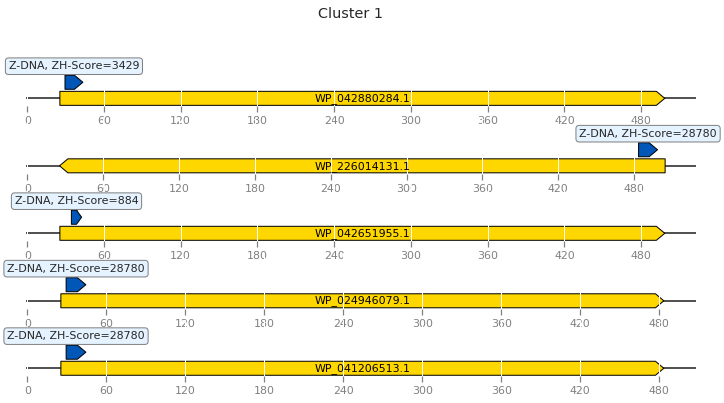

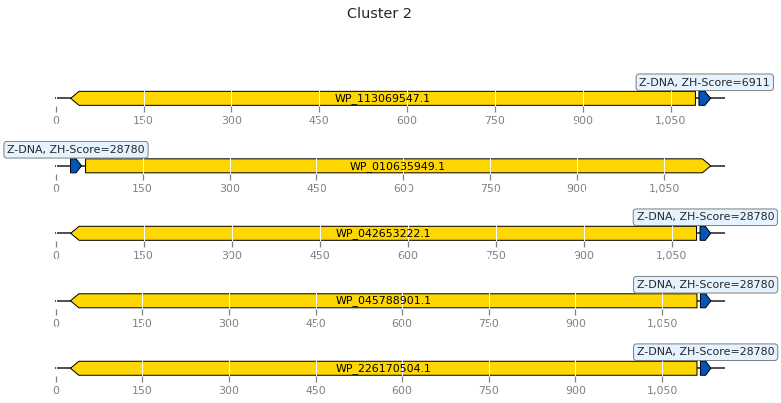

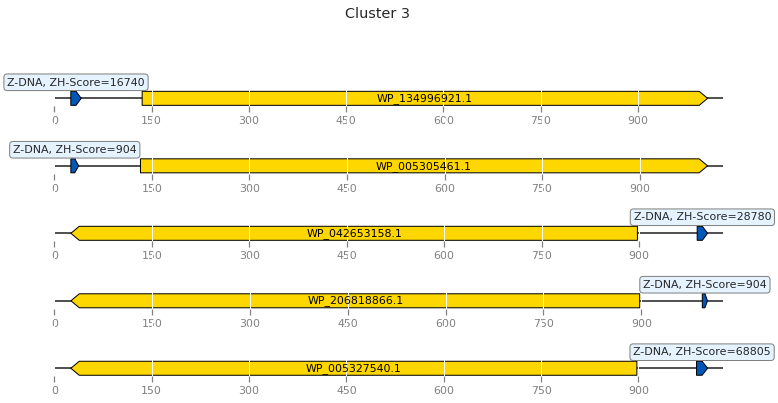

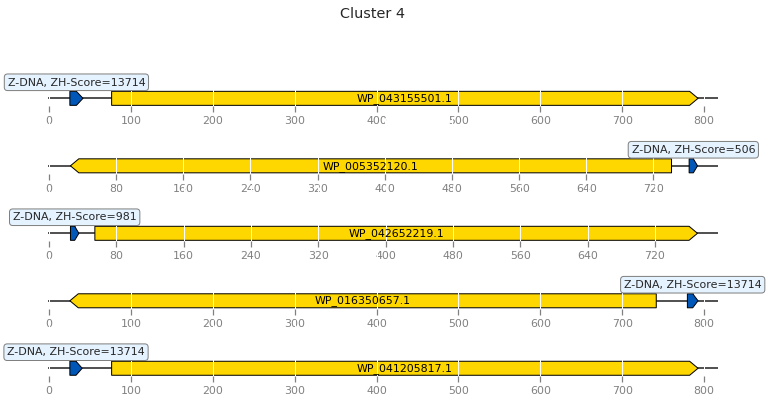

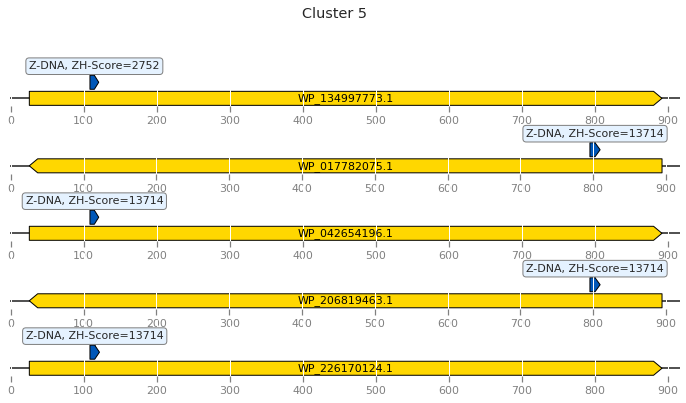

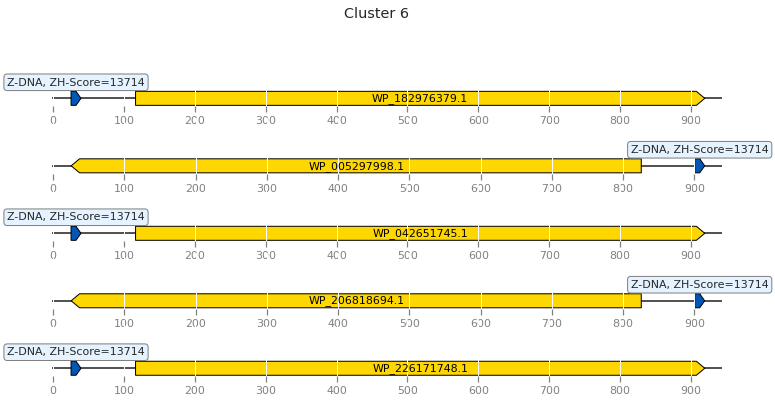

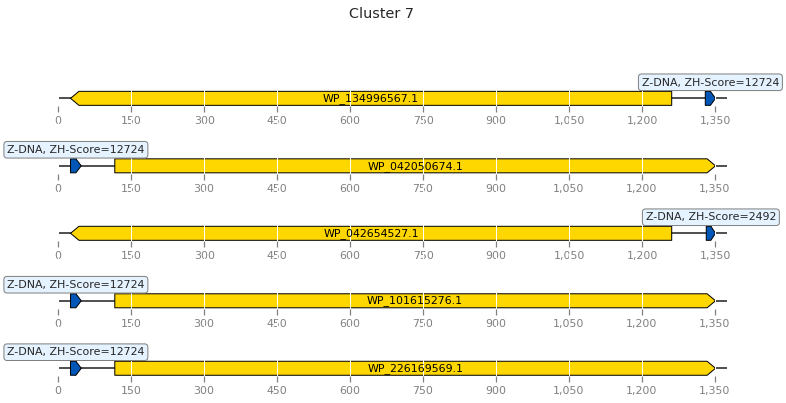

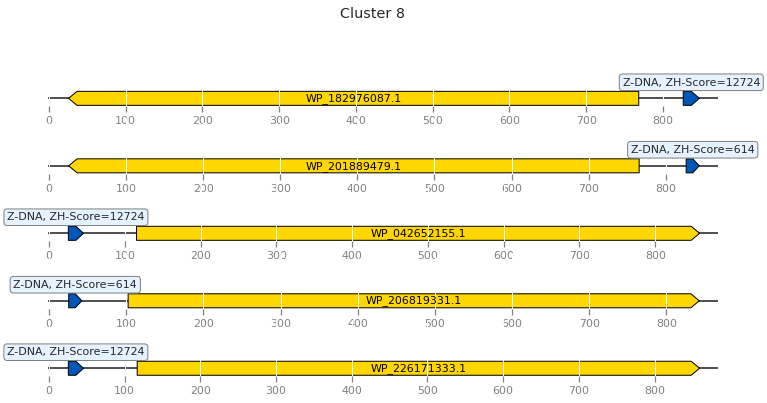

In [101]:
counter = 1
for k, row in chosen.iterrows():
    fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(12, 6))
    fig.suptitle(f'Cluster {counter}')

    for i, genome in enumerate(genomes_list):
        zdna = zdna_dict[genome]
        features = features_dict[genome]

        prot = row.loc[genome + '_protein.faa']
        Z_DNA_label = "Z-DNA, ZH-Score=" + str(round(zdna.loc[prot][f"Score_{genome}"]))
        coords = [zdna.loc[prot, "Start"], zdna.loc[prot, "End"],
                  features.loc[prot, "start"], features.loc[prot, "end"]]
        minimum = min(coords)

        strand = +1 if features.loc[prot, "strand"]=="+" else -1

        features=[
        GraphicFeature(start=coords[0]-minimum+26, end=coords[1]-minimum+26, 
                   strand=+1, color="#0057b8", label=Z_DNA_label),
        GraphicFeature(start=coords[2]-minimum+26, end=coords[3]-minimum+26, 
                   strand=strand, color="#ffd700", label=prot),
                   ]
        record = GraphicRecord(sequence_length=max(coords)-minimum+50, features=features)
        record.plot(ax=axes[i])
    plt.savefig(f'pictures/Cluster_{counter}.png', dpi=500)
    counter += 1

# Бонусная часть

## Поиск G-квадруплексов

In [102]:
na_seqs = dict()
for genome in genomes_list:
    na_seqs[genome] = choose_max_seq(genome)

### Установка программ

In [105]:

! git clone https://github.com/freezer333/qgrs-cpp
! g++ -o qgrs qgrs-cpp/src/default.cpp qgrs-cpp/src/qgrs.cpp --std=c++11
! rm -rf qgrs-cpp


Cloning into 'qgrs-cpp'...
remote: Enumerating objects: 75, done.
remote: Total 75 (delta 0), reused 0 (delta 0), pack-reused 75
Unpacking objects: 100% (75/75), done.


In [107]:
# Не хватает оперативки

import os
import subprocess
import tempfile
from pathlib import Path
from subprocess import DEVNULL, PIPE

Q_EXECUTABLE = Path("/content/qgrs")
assert Q_EXECUTABLE.is_file()


def qgrs(query: str):
    assert set(query).issubset({"A", "C", "G", "T", "N"})
    fd, temp = tempfile.mkstemp()
    os.close(fd)
    with open(temp, 'w') as stream:
        stream.write(query)

    subprocess.run(
        [Q_EXECUTABLE, "-csv", "-i", temp, "-o", temp + ".qgrs"],
        check=True, stdout=PIPE, stderr=DEVNULL,
        input=query, encoding='ascii'
    )
    
    with open(temp + ".qgrs", 'r') as stream:
        df = pd.read_csv(stream,
                         #names=['ID', 'T1', 'T2', 'T3', 'T4', 'TS', 'GS', 'SEQ'],
                         skiprows=1, sep=',').iloc[:,:8]
    os.remove(temp)
    os.remove(temp + ".qgrs")
    df.set_index("ID", inplace=True)
    #df = df.loc[df["ZH-Score"] > 500]
    return df
    # return df[['Start', 'End', 'ZH-Score', 'Sequence', 'Conformation']]

qgrs("GGACGGCGAGGTGCCCACTGGCGACGCAGG")


,T1,T2,T3,T4,TS,GS,SEQ
ID,,,,,,,
1,0,9,19,28,2,20,GGACGGCGAGGTGCCCACTGGCGACGCAGG


In [113]:
qgrs(na_seqs[genome][:50000])

,T1,T2,T3,T4,TS,GS,SEQ
ID,,,,,,,
1,513,522,525,534,2,17,GGCCCGAGCGGCGGCCCGTCAGG
2,580,583,589,595,2,19,GGGGGCACCGGTCTGGG
3,680,690,696,702,2,18,GGTTCGTGCAGGACATGGTGAAGG
4,925,929,931,939,2,17,GGCTGGGGCCTGACGG
5,1293,1299,1305,1311,2,21,GGCGATGGCCCTGGCCAAGG
...,...,...,...,...,...,...,...
296,49512,49515,49519,49521,2,19,GGTGGTTGGGG
297,49582,49593,49600,49609,2,18,GGTGTTGCCGAGGGACTTGGACATCTTGG
298,49628,49632,49635,49639,2,20,GGCAGGCGGCCGG


In [114]:
! wget https://raw.githubusercontent.com/AnimaTardeb/G4Hunter/master/G4Hunter.py

--2022-06-15 10:29:40--  https://raw.githubusercontent.com/AnimaTardeb/G4Hunter/master/G4Hunter.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14003 (14K) [text/plain]
Saving to: ‘G4Hunter.py’

G4Hunter.py         100%[===================>]  13.67K  --.-KB/s    in 0s      

2022-06-15 10:29:40 (54.8 MB/s) - ‘G4Hunter.py’ saved [14003/14003]



In [115]:
! wget https://bootstrap.pypa.io/pip/2.7/get-pip.py
! python2 get-pip.py
! rm get-pip.py
! sudo apt-get install python2.7-tk

--2022-06-15 10:29:42--  https://bootstrap.pypa.io/pip/2.7/get-pip.py
Resolving bootstrap.pypa.io (bootstrap.pypa.io)... 151.101.0.175, 151.101.64.175, 151.101.128.175, ...
Connecting to bootstrap.pypa.io (bootstrap.pypa.io)|151.101.0.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1908226 (1.8M) [text/x-python]
Saving to: ‘get-pip.py’

get-pip.py          100%[===================>]   1.82M  --.-KB/s    in 0.06s   

2022-06-15 10:29:42 (30.8 MB/s) - ‘get-pip.py’ saved [1908226/1908226]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'python-tk' instead of 'python2.7-tk'
python-tk is already the newe

In [116]:
! python2 -m pip install numpy matplotlib biopython==1.76


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.3 MB/s 
     |████████████████████████████████| 16.3 MB 26.9 MB/s 
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
     |████████████████████████████████| 503 kB 79.1 MB/s 
     |████████████████████████████████| 69 kB 7.4 MB/s 
  Created wheel for biopython: filename=biopython-1.76-cp27-cp27mu-linux_x86_64.whl size=2373426 sha256=623b858b8e77397a8737bc7c46332104205fcd06f0f774426d29f22ba435374c
  Stored in directory: /root/.cache/pip/wheels/c0/b7/a4/94ee77ba6ad7b5babcdfe31afa726083d75412bcfb002bea6d
Successfully built biopython


In [120]:
# Не хватает оперативки

import os
import subprocess
import tempfile
from pathlib import Path
from subprocess import DEVNULL, PIPE

G4_EXECUTABLE = Path("G4Hunter.py")
assert G4_EXECUTABLE.is_file()


def G4(query: str, windowsize: int = 6, threshold: int = 10):
    assert set(query).issubset({"A", "C", "G", "T", "N"})
    fd, temp = tempfile.mkstemp()
    os.close(fd)
    with open(temp, 'w') as stream:
        stream.write(query)

    subprocess.run(
        ["python2", G4_EXECUTABLE, "-i", temp, "-o", "test" + ".G4",
         "-w", windowsize, "-s", threshold],
        check=True, stdout=PIPE, stderr=DEVNULL,
        input=query, encoding='ascii'
    )


    
    with open(temp + ".qgrs", 'r') as stream:
        df = pd.read_csv(stream,
                         names=['ID', 'T1', 'T2', 'T3', 'T4', 'TS', 'GS', 'SEQ'],
                         skiprows=1, sep='\s+')
    os.remove(temp)
    os.remove(temp + ".Z-SCORE")
    df = df.loc[df["ZH-Score"] > 500]
    return df[['Start', 'End', 'ZH-Score', 'Sequence', 'Conformation']]
    
    return 0

### Ставим PQSfinder и запускаем

In [123]:
 %load_ext rpy2.ipython

In [185]:
!wget https://raw.githubusercontent.com/narek01/hse22_project/main/pqsfinder.r

--2022-06-15 11:41:47--  https://raw.githubusercontent.com/narek01/hse22_project/main/pqsfinder.r
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476 [text/plain]
Saving to: ‘pqsfinder.r.1’

pqsfinder.r.1       100%[===================>]     476  --.-KB/s    in 0s      

2022-06-15 11:41:48 (14.6 MB/s) - ‘pqsfinder.r.1’ saved [476/476]



In [182]:
!wget https://raw.githubusercontent.com/narek01/hse22_project/main/configure.r

--2022-06-15 11:35:31--  https://raw.githubusercontent.com/narek01/hse22_project/main/configure.r
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287 [text/plain]
Saving to: ‘configure.r.1’

configure.r.1       100%[===================>]     287  --.-KB/s    in 0s      

2022-06-15 11:35:31 (7.96 MB/s) - ‘configure.r.1’ saved [287/287]



In [183]:
! Rscript configure.r.1

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)
Warning message:
package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'pqsfinder' 
'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)
Installing package(s) 'rtracklayer'
also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘matrixStats’, ‘futile.logger’, ‘snow’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘BiocParallel’, ‘Rhtslib’, ‘SummarizedExperiment’, ‘rjson’, ‘XML’, ‘Rsamtools’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’

trying URL 'https://cran.rstudio.com/src/contrib/formatR_1.12.tar.gz'
Content type 'application/

In [186]:
import os
import subprocess
import tempfile
from pathlib import Path
from subprocess import DEVNULL, PIPE

Q_EXECUTABLE = Path("pqsfinder.r.1")
assert Q_EXECUTABLE.is_file()


def pqs_exec(query: str):
    assert set(query).issubset({"A", "C", "G", "T", "N"})
    fd, temp = tempfile.mkstemp()
    os.close(fd)
    with open(temp, 'w') as stream:
        stream.write(">chr\n"+query)

    subprocess.run(
        ["Rscript", Q_EXECUTABLE, temp, temp + ".qgrs"],
        check=True, stdout=PIPE, stderr=DEVNULL,
        input=query, encoding='ascii'
    )
    
    with open(temp + ".qgrs", 'r') as stream:
        df = pd.read_csv(stream,
                         #names=['ID', 'T1', 'T2', 'T3', 'T4', 'TS', 'GS', 'SEQ'],
                         skiprows=0, sep=' ').iloc[:,:8]
    os.remove(temp)
    os.remove(temp + ".qgrs")
    #df = df.loc[df["score"] > 500]
    #return df
    return df[['start', 'end', 'score', 'strand']]

In [187]:
pqs_dict = dict()
for genome in genomes_list:
    pqs_dict[genome] = pqs_exec(na_seqs[genome])

In [188]:
def process_pqs_data(df):
    df = df.sort_values(["end", "start"], ascending=True)

    # Count length with overlapping positions
    pos = 0
    length = 0
    for i, row in df.iterrows():
        if row.start > pos:
            length += row.end - row.start + 1
            pos = row.end
        elif row.start < pos and row.end > pos:
            length += row.end - pos + 1
            pos = row.end
    
    return [len(df), length]

In [189]:
pqs_stats = dict()
for genome in genomes_list:
    pqs_stats[genome] = process_pqs_data(pqs_dict[genome])

pd.DataFrame(pqs_stats, index=["Number of quadruplex regions (with overlaps)", "Quadruplex length"])

,A_caviae,A_dhakensis,A_encheleia,A_hydrophila,A_media
Number of quadruplex regions (with overlaps),3919,2998,3149,2815,3302
Quadruplex length,121057,91507,96600,85445,101636


In [193]:
!pwd
!mkdir histograms

/content/pqsfinder


In [194]:
sns.set_theme()
for genome in genomes_list:
    sns.histplot(data=pqs_dict[genome], x="score", bins=30, log_scale=False)
    plt.title(genome.replace('_', '. ')+" Quadruplex Scores")
    plt.savefig(f"histograms/{genome}_quadruplex.png", dpi=400)
    plt.close()

In [195]:
! mkdir -p pqs_result
for genome in genomes_list:
    pqs_dict[genome].to_csv(f"pqs_result/{genome}.pqs.txt", index=None)

In [196]:
for genome in genomes_list:
    df = pqs_dict[genome].copy()
    bed_df = pd.DataFrame(
        {
            "chrom": [genome] * len(df),
            "chromStart": df.start,
            "chromEnd": df.end,
            "name": df.index,
            "score": df.score,
            "strand": df.strand
        }
    )

    bed_df.to_csv(f"pqs_result/{genome}.pqs.bed", index=None, sep='\t')


In [200]:
!mkdir intersect

In [197]:
for genome in genomes_list:
  !bedtools merge -c 5,6 -o max,distinct -i pqs_result/{genome}.pqs.bed > pqs_result/{genome}.pqs.merged.bed


In [203]:
for genome in genomes_list:
  !bedtools intersect -a /content/TSS/{genome}.slop.bed -b pqs_result/{genome}.pqs.merged.bed -wb > intersect/{genome}_quadruplex.inter.bed


In [204]:
def read_pqs_df(genome):
    pqs = pd.read_csv(f"intersect/{genome}_quadruplex.inter.bed", sep='\t', 
                names=["Sp1", "St1", "En1", "Protein", "Sp2", "Start", "End", f"Score_{genome}", "Strand"]
                )[["Protein", f"Score_{genome}", "Start", "End", "Strand"]]
    pqs.sort_values(f"Score_{genome}", ascending=False, inplace=True)
    # Drop duplicate proteins, keep maximal score
    pqs.drop_duplicates(subset='Protein', inplace=True)
    pqs.set_index("Protein", inplace=True)
    return pqs

In [205]:
for genome in genomes_list:
    pqs = read_pqs_df(genome)[f"Score_{genome}"]
    list_of_scores = [float(pqs.loc[prot]) if prot in list(pqs.index) else None for prot in clusters[f"{genome}_protein.faa"]]
    clusters[f"{genome}_protein.quadro"] = list_of_scores
clusters.head()

,# Species,Genes,Alg.-Conn.,A_caviae_protein.faa,A_dhakensis_protein.faa,A_encheleia_protein.faa,A_hydrophila_protein.faa,A_media_protein.faa,A_caviae_protein.score,A_dhakensis_protein.score,A_encheleia_protein.score,A_hydrophila_protein.score,A_media_protein.score,A_caviae_protein.quadro,A_dhakensis_protein.quadro,A_encheleia_protein.quadro,A_hydrophila_protein.quadro,A_media_protein.quadro
0,5,5,1.0,WP_010673503.1,WP_005298604.1,WP_005298604.1,WP_005298604.1,WP_005298604.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,5,1.0,WP_010674777.1,WP_005300775.1,WP_042653798.1,WP_011706148.1,WP_005329637.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,5,1.0,WP_182975740.1,WP_005300804.1,WP_042653789.1,WP_005300804.1,WP_043131825.1,NaN,NaN,NaN,NaN,908.3955,NaN,NaN,NaN,NaN,47.0
3,5,5,1.0,WP_182975741.1,WP_226014495.1,WP_042653790.1,WP_206819951.1,WP_226172894.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,1.0,WP_182975742.1,WP_017780109.1,WP_042653791.1,WP_206819950.1,WP_041205797.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
chosen = clusters.dropna(subset=clusters.columns[-5:])
medians = chosen.iloc[:, 8:13].median(axis=1)
chosen["median_score"] = medians
chosen.sort_values("median_score", ascending=False, inplace=True)
chosen = chosen.iloc[:8,:]
chosen

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,# Species,Genes,Alg.-Conn.,A_caviae_protein.faa,A_dhakensis_protein.faa,A_encheleia_protein.faa,A_hydrophila_protein.faa,A_media_protein.faa,A_caviae_protein.score,A_dhakensis_protein.score,A_encheleia_protein.score,A_hydrophila_protein.score,A_media_protein.score,A_caviae_protein.quadro,A_dhakensis_protein.quadro,A_encheleia_protein.quadro,A_hydrophila_protein.quadro,A_media_protein.quadro,median_score
2425,5,5,1.0,WP_134996647.1,WP_042051062.1,WP_042652626.1,WP_206818508.1,WP_171273422.1,8323.2570,8323.2570,2173.083,8323.257,8323.2570,50.0,50.0,48.0,50.0,50.0,8323.2570
2908,5,5,1.0,WP_039038770.1,WP_201881213.1,WP_042652457.1,WP_017784880.1,WP_226172475.1,NaN,6420.0080,NaN,6420.008,NaN,48.0,72.0,101.0,92.0,79.0,6420.0080
1107,5,5,1.0,WP_232092847.1,WP_226014537.1,WP_084228259.1,WP_206819216.1,WP_226170607.1,NaN,4270.7350,1138.993,4270.735,NaN,52.0,70.0,70.0,99.0,70.0,4270.7350
2092,5,5,1.0,WP_134996712.1,WP_226014384.1,WP_042651322.1,WP_206819662.1,WP_226169758.1,766.6232,3428.5290,3428.529,3428.529,766.6232,66.0,69.0,67.0,67.0,69.0,3428.5290
83,5,5,1.0,WP_182975927.1,WP_201882273.1,WP_042653830.1,WP_206818340.1,WP_226172125.1,3428.5290,505.8732,2752.447,NaN,NaN,49.0,49.0,49.0,51.0,47.0,2752.4470
356,5,5,1.0,WP_134998002.1,WP_117404490.1,WP_042653979.1,WP_017783492.1,WP_226169886.1,NaN,1220.2550,3713.330,1220.255,28780.5000,68.0,68.0,68.0,68.0,68.0,2466.7925
2826,5,5,1.0,WP_029313803.1,WP_139396685.1,WP_042652159.1,WP_024944550.1,WP_226171348.1,2173.0830,8323.2570,NaN,2541.412,533.3142,69.0,59.0,50.0,59.0,53.0,2357.2475
2755,5,5,1.0,WP_010674862.1,WP_226014477.1,WP_042652263.1,WP_206819908.1,WP_005329332.1,NaN,NaN,NaN,2347.625,NaN,55.0,48.0,76.0,47.0,55.0,2347.6250


In [216]:
chosen = clusters.dropna(subset=clusters.columns[-5:], how="all", thresh=4)
chosen

,# Species,Genes,Alg.-Conn.,A_caviae_protein.faa,A_dhakensis_protein.faa,A_encheleia_protein.faa,A_hydrophila_protein.faa,A_media_protein.faa,A_caviae_protein.score,A_dhakensis_protein.score,A_encheleia_protein.score,A_hydrophila_protein.score,A_media_protein.score,A_caviae_protein.quadro,A_dhakensis_protein.quadro,A_encheleia_protein.quadro,A_hydrophila_protein.quadro,A_media_protein.quadro
33,5,5,1.0,WP_104455751.1,WP_226013908.1,WP_042653748.1,WP_206817889.1,WP_226173108.1,NaN,NaN,NaN,NaN,NaN,87.0,67.0,71.0,48.0,67.0
57,5,5,1.0,WP_182975944.1,WP_201882308.1,WP_042653859.1,WP_206818394.1,WP_226172077.1,NaN,NaN,NaN,NaN,NaN,60.0,50.0,54.0,49.0,65.0
64,5,5,1.0,WP_182975951.1,WP_226014356.1,WP_042653878.1,WP_206819634.1,WP_226172061.1,NaN,980.8116,614.1623,980.8116,785.5658,61.0,59.0,85.0,59.0,52.0
65,5,5,1.0,WP_010673620.1,WP_024942903.1,WP_042653879.1,WP_206819633.1,WP_214006140.1,NaN,NaN,38833.5800,NaN,NaN,52.0,72.0,NaN,52.0,70.0
83,5,5,1.0,WP_182975927.1,WP_201882273.1,WP_042653830.1,WP_206818340.1,WP_226172125.1,3428.529,505.8732,2752.4470,NaN,NaN,49.0,49.0,49.0,51.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,5,5,1.0,WP_039038746.1,WP_005299692.1,WP_042652439.1,WP_016350375.1,WP_226172485.1,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0
2938,5,5,1.0,WP_182975807.1,WP_201881220.1,WP_042652454.1,WP_206817988.1,WP_042649321.1,NaN,NaN,NaN,NaN,NaN,49.0,48.0,48.0,NaN,52.0
2990,5,5,1.0,WP_103260271.1,WP_024943461.1,WP_042652364.1,WP_206819798.1,WP_226172572.1,NaN,NaN,NaN,NaN,NaN,50.0,60.0,NaN,60.0,48.0
3000,5,5,1.0,WP_010675028.1,WP_024941392.1,WP_042652374.1,WP_005299840.1,WP_005324228.1,NaN,NaN,NaN,NaN,NaN,54.0,NaN,54.0,54.0,54.0


In [217]:
chosen = chosen.dropna(subset=chosen.columns[-5:])
medians = chosen.iloc[:, 8:13].median(axis=1)
chosen["median_score"] = medians
chosen.sort_values("median_score", ascending=False, inplace=True)
chosen = chosen.iloc[:8,:]
chosen

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,# Species,Genes,Alg.-Conn.,A_caviae_protein.faa,A_dhakensis_protein.faa,A_encheleia_protein.faa,A_hydrophila_protein.faa,A_media_protein.faa,A_caviae_protein.score,A_dhakensis_protein.score,A_encheleia_protein.score,A_hydrophila_protein.score,A_media_protein.score,A_caviae_protein.quadro,A_dhakensis_protein.quadro,A_encheleia_protein.quadro,A_hydrophila_protein.quadro,A_media_protein.quadro,median_score
2425,5,5,1.0,WP_134996647.1,WP_042051062.1,WP_042652626.1,WP_206818508.1,WP_171273422.1,8323.2570,8323.2570,2173.083,8323.257,8323.2570,50.0,50.0,48.0,50.0,50.0,8323.2570
2908,5,5,1.0,WP_039038770.1,WP_201881213.1,WP_042652457.1,WP_017784880.1,WP_226172475.1,NaN,6420.0080,NaN,6420.008,NaN,48.0,72.0,101.0,92.0,79.0,6420.0080
1107,5,5,1.0,WP_232092847.1,WP_226014537.1,WP_084228259.1,WP_206819216.1,WP_226170607.1,NaN,4270.7350,1138.993,4270.735,NaN,52.0,70.0,70.0,99.0,70.0,4270.7350
2092,5,5,1.0,WP_134996712.1,WP_226014384.1,WP_042651322.1,WP_206819662.1,WP_226169758.1,766.6232,3428.5290,3428.529,3428.529,766.6232,66.0,69.0,67.0,67.0,69.0,3428.5290
83,5,5,1.0,WP_182975927.1,WP_201882273.1,WP_042653830.1,WP_206818340.1,WP_226172125.1,3428.5290,505.8732,2752.447,NaN,NaN,49.0,49.0,49.0,51.0,47.0,2752.4470
356,5,5,1.0,WP_134998002.1,WP_117404490.1,WP_042653979.1,WP_017783492.1,WP_226169886.1,NaN,1220.2550,3713.330,1220.255,28780.5000,68.0,68.0,68.0,68.0,68.0,2466.7925
2826,5,5,1.0,WP_029313803.1,WP_139396685.1,WP_042652159.1,WP_024944550.1,WP_226171348.1,2173.0830,8323.2570,NaN,2541.412,533.3142,69.0,59.0,50.0,59.0,53.0,2357.2475
2755,5,5,1.0,WP_010674862.1,WP_226014477.1,WP_042652263.1,WP_206819908.1,WP_005329332.1,NaN,NaN,NaN,2347.625,NaN,55.0,48.0,76.0,47.0,55.0,2347.6250


In [218]:
from dna_features_viewer import GraphicFeature, GraphicRecord
quadro_dict = dict()
for genome in genomes_list:
    features_dict[genome].set_index("product_accession", drop=False, inplace=True)
    quadro_dict[genome] = read_pqs_df(genome)

In [219]:
!mkdir pictures

mkdir: cannot create directory ‘pictures’: File exists


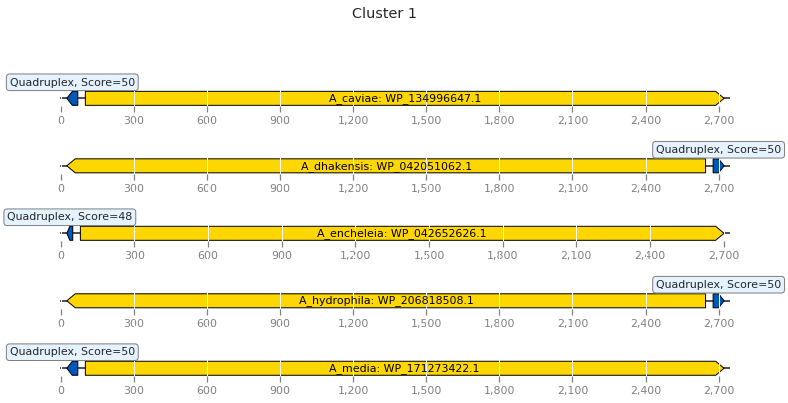

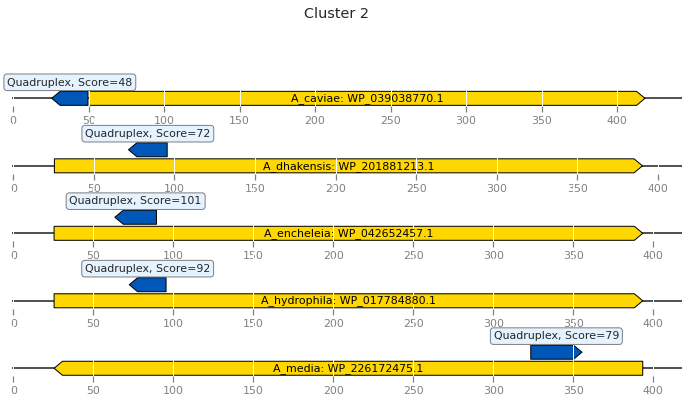

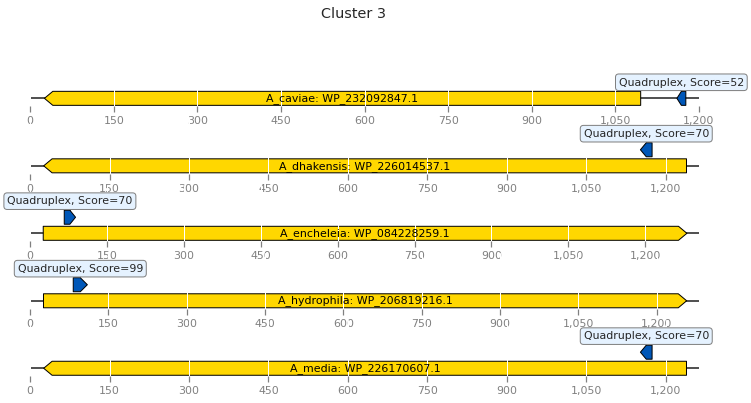

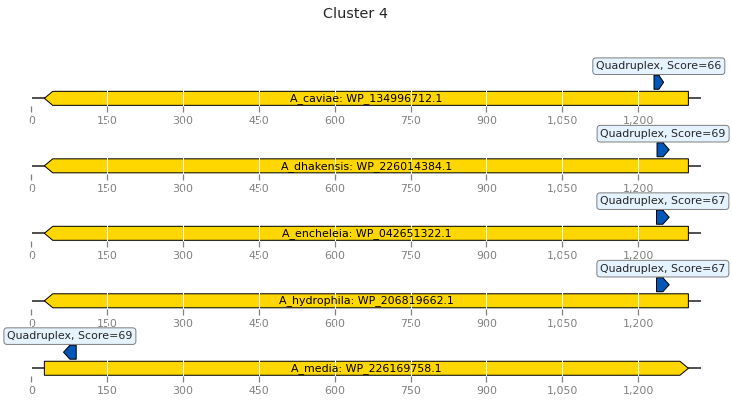

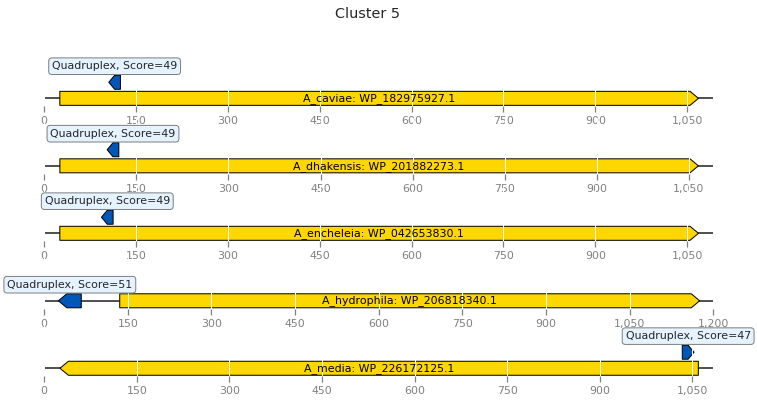

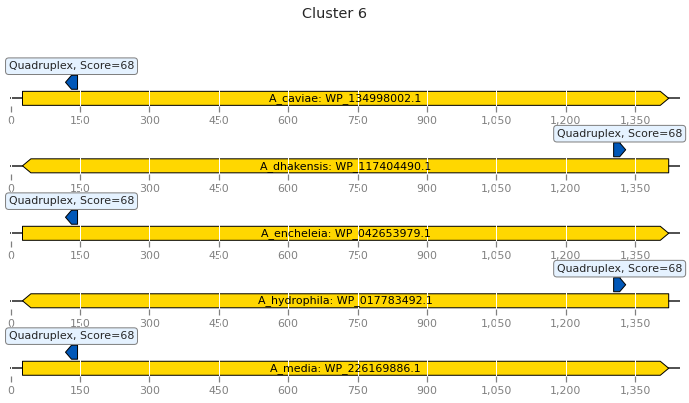

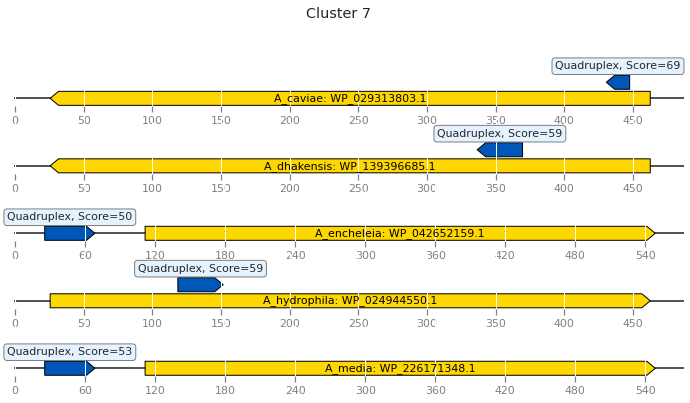

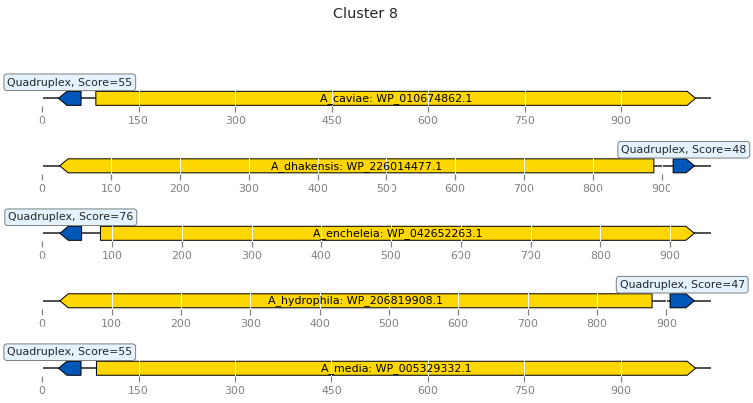

In [220]:
counter = 1
for k, row in chosen.iterrows():
    rows_num = len(row.iloc[-5:].dropna())
    fig, axes = plt.subplots(nrows=rows_num, ncols=1,figsize=(12, 6*rows_num/5))
    fig.suptitle(f'Cluster {counter}')
    axes_count = 0

    for i, genome in enumerate(genomes_list):
        quad = quadro_dict[genome]
        features = features_dict[genome]

        prot = row.loc[genome + '_protein.faa']
        if not prot in quad.index:
            continue

        quad_label = "Quadruplex, Score=" + str(round(quad.loc[prot][f"Score_{genome}"]))
        coords = [quad.loc[prot, "Start"], quad.loc[prot, "End"],
                  features.loc[prot, "start"], features.loc[prot, "end"]]
        minimum = min(coords)

        strand_q = +1 if quad.loc[prot, "Strand"]=="+" else -1
        strand_f = +1 if features.loc[prot, "strand"]=="+" else -1


        features=[
        GraphicFeature(start=coords[0]-minimum+26, end=coords[1]-minimum+26, 
                   strand=strand_q, color="#0057b8", label=quad_label),
        GraphicFeature(start=coords[2]-minimum+26, end=coords[3]-minimum+26, 
                   strand=strand_f, color="#ffd700", label=genome + ": " + prot),
                   ]
        record = GraphicRecord(sequence_length=max(coords)-minimum+50, features=features)
        record.plot(ax=axes[axes_count])
        axes_count += 1
    plt.savefig(f'pictures/Cluster_{counter}_quadruplex.png', dpi=500)
    counter += 1